In [1]:
from Project4.verification_net import VerificationNet
from Project4.stacked_mnist import StackedMNISTData, DataMode
from var_ae_routine import VAE_Routine
import torch

In [2]:
torch.manual_seed(1)
""" GENERATIVE VAE ROUTINE"""
batch_size = 16
data_object = StackedMNISTData(
    mode=DataMode.MONO_FLOAT_COMPLETE,
    default_batch_size=batch_size)
net = VerificationNet(force_learn=False)
net.train(
    generator=data_object,
    epochs=5)  # gen=data_object, makes sure we test on the same type of data as the model was trained on
verification_tolerance = 0.8 if data_object.channels == 1 else 0.5

learning_rate = 1.0e-2
loss_function = 'elbo'
optimizer = 'adam'
epochs = 20

latent_vector_size = 256
num_samples = 2000
gen_name = '3_conv_layers_lvs:_256_filters:32_lldim:8,4,4_epochs:20'
gen_vae_save_path = f'checkpoints/gen_VAE/{gen_name}'
vae_routine = VAE_Routine(
    data_object,
    learning_rate,
    loss_function,
    optimizer,
    epochs,
    #
    latent_vector_size,
    batch_size,
    num_samples,
    gen_vae_save_path
)


11493376/11490434 [==============================] - 0s 0us/step
VAE(
  (encoder): Encoder(
    (body): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (mean_layer): Linear(in_features=128, out_features=256, bias=True)
    (log_std_layer): Linear(in_features=128, out_features=256, bias=True)
  )
  (decoder): Decoder(
    (model): Sequential(
      (0): Linear(in_features=256, out_features=128, bias=True)
      (1): Unflatten(dim=1, unflattened_size=(8, 4, 4))
      (2): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    


VAE TRAINING

Epoch: 0, Iteration: 1875, Validation loss: 1211.1128, Validation KL_div 6.7973, Validation reconstruction loss -1204.3162
Epoch: 0, Iteration: 3750, Validation loss: 1199.0194, Validation KL_div 7.7738, Validation reconstruction loss -1191.2455
Epoch: 1, Iteration: 5625, Validation loss: 1178.2401, Validation KL_div 9.6476, Validation reconstruction loss -1168.5912
Epoch: 1, Iteration: 7500, Validation loss: 1157.2111, Validation KL_div 11.571, Validation reconstruction loss -1145.6406
Epoch: 2, Iteration: 9375, Validation loss: 1135.1085, Validation KL_div 10.6178, Validation reconstruction loss -1124.4907
Epoch: 2, Iteration: 11250, Validation loss: 1116.0631, Validation KL_div 10.4465, Validation reconstruction loss -1105.6173
Epoch: 3, Iteration: 13125, Validation loss: 1098.9611, Validation KL_div 11.4792, Validation reconstruction loss -1087.4813
Epoch: 3, Iteration: 15000, Validation loss: 1084.7306, Validation KL_div 10.9676, Validation reconstruction loss -1073

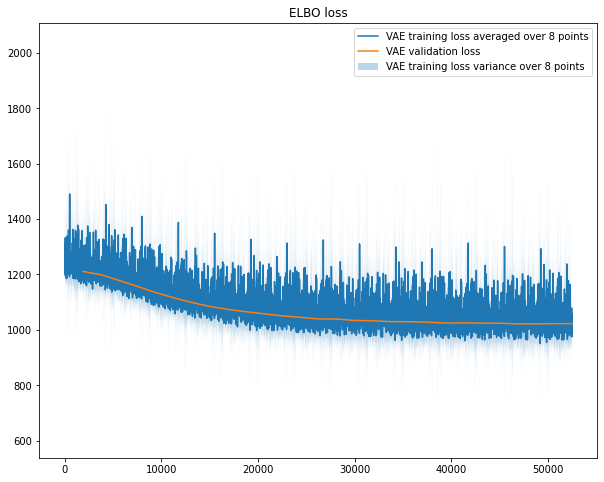

In [3]:
"""OPTIONAL TRAINING"""
vae_routine.train_vae()

Loaded model from checkpoints/gen_VAE/3_conv_layers_lvs:_256_filters:32_lldim:8,4,4_epochs:20


/home/martahal/home/Deep_Learning/Projects/Project3/visualisations.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(int(no_rows), int(no_cols), int(img_idx + 1))


CHECKING RECONSTRUCTED IMAGES QUALITY
Number of reconstructions: 10000
Coverage: 100.00%
Predictability: 75.61%
Accuracy: 60.07%
CHECKING GENERATED IMAGES QUALITY


/home/martahal/home/Deep_Learning/Projects/Project3/visualisations.py:87: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(int(no_rows), int(no_cols), int(img_idx + 1))


Number of reconstructions: 2000
Coverage: 100.00%
Predictability: 51.30%


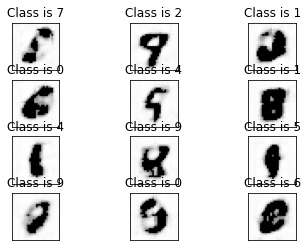

In [4]:
"""TESTING ON SPECIFIED MODEL"""
model_name = '3_conv_layers_lvs:_256_filters:32_lldim:8,4,4_epochs:20'
test_model_path = f'checkpoints/gen_VAE/{model_name}'
images, reconstructions, labels = vae_routine.reconstruct_test_data(load_model_path=test_model_path)

# Check quality of reconstructions:
print('CHECKING RECONSTRUCTED IMAGES QUALITY')
print(f'Number of reconstructions: {len(reconstructions)}')
vae_routine.check_vae_performance(net, verification_tolerance, reconstructions, labels)
# Check quality of generated images
print('CHECKING GENERATED IMAGES QUALITY')
generated_images = vae_routine.generate_samples()
print(f'Number of reconstructions: {len(generated_images)}')
vae_routine.check_vae_performance(net, verification_tolerance, generated_images)